# A. Project Overview



<img src="ml-process-lifecycle.png" alt="description of the image" width="1400" height="750" >


* Objective: Develop a machine learning model to predict house prices using a relevant dataset. Dataset: Use the "House Prices - Advanced Regression Techniques" dataset from Kaggle or another relevant dataset.

* Aims & Objectives 
The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.

### This project marks the last chapter of my teachings at Altschool Africa. The experience has been awesome, challenging and sometimes overwelming, but i'm grateful for it all.




P.s Pablo,you've been an awesome teacher, so thank you for everything.

I apologize for not submitting my third assessment on time. I was busy with my finals and didn't have time to complete it. I have added some extra analysis to the code. Please review it and award the appropriate score. Thank you.

### Deliverables
* Code: Submit the complete code used for data preparation, EDA, feature engineering, model training, and evaluation in Jupyter Notebook format.

* Report: Submit a detailed report (PDF or Jupyter Notebook format) documenting your approach, findings, and conclusions. Include visualizations and a clear explanation of your steps.

* Presentation: Prepare a brief presentation (5-10 slides) summarizing your project and key findings.



<img src="ML book.png" alt="description of the image" width="800" height="500" >

# B. Phase 1:Problem Framing



Given that the House Prices: Advanced Regression Techniques dataset is widely used, it's important for me to approach the problem in a way that adds a unique perspective or tackles a specific aspect that might not have been extensively explored.

Chat-gpt and I brainstormed on the various problem statement i can explore based on the data, and I decided to go for the following:

### Fairness and Bias in House Price Predictions

* Problem Statement: Develop a house price prediction model while focusing on identifying and mitigating biases related to location, socio-economic status, and house condition. The goal is to ensure fair pricing predictions across different neighborhoods and property types, addressing potential issues of bias in machine learning models.

* Unique Angle: By tackling fairness and bias, this approach addresses ethical concerns in real estate pricing, ensuring that the model does not disproportionately undervalue or overvalue properties based on non-economic factors.

# C. Phase 2:Assumption Reporting



### Assumptions:
* Data Quality: We assume that the data provided is accurate and representative of the real-world housing market in Ames. Any discrepancies or errors in the data could lead to biased predictions.
* Missing Data: We assume that missing data, if present, either does not systematically bias the dataset or can be handled appropriately through imputation or other techniques.
* Feature Representation: We assume that the features provided (such as Neighborhood, OverallQual, YearBuilt) are sufficient to capture the essential factors influencing house prices and that they are accurately represented.
* Economic Factors: We assume that economic conditions affecting house prices (e.g., inflation, interest rates) are stable or have a uniform impact across the dataset. The model does not account for external economic shocks.
* Fairness Definitions: We assume that fairness in this context means avoiding systematic overvaluation or undervaluation of properties based on non-economic factors like location or socio-economic status.
* Model Generalization: We assume that the trained model will generalize well to unseen data, meaning it will perform accurately and fairly on new properties not included in the training set.


### Justifications:
* Data Quality: The dataset has been widely used in previous studies, suggesting that it is of good quality. However, we will perform data validation to ensure its reliability.
* Missing Data: Handling missing data is a common practice in data science, and techniques like imputation are well-established. We will use methods that have been proven to work effectively in similar scenarios.
* Feature Representation: The features are well-documented and cover a broad range of house characteristics, making them likely to be representative of factors influencing house prices. We will conduct EDA to confirm their relevance.
* Economic Factors: While external economic factors are not directly included, we will ensure that our model’s focus on fairness and bias does not disproportionately affect certain groups or neighborhoods.
* Fairness Definitions: Our definition of fairness is informed by ethical guidelines in machine learning, aiming to ensure that no group is unfairly disadvantaged by the model’s predictions.
* Model Generalization: We will validate the model on a separate testing set and potentially use cross-validation to ensure that it generalizes well.


### Impact Analysis:
* Data Quality: If the data is inaccurate or not representative, our model’s predictions could be biased, leading to unfair outcomes. We will conduct thorough data cleaning and validation to minimize this risk.
* Missing Data: Improper handling of missing data could introduce bias, especially if certain groups are underrepresented. We will carefully choose imputation methods that consider potential biases.
* Feature Representation: If important features are missing or inaccurately represented, our model might overlook critical factors affecting house prices, leading to biased predictions. We will explore potential additional features during EDA.
* Economic Factors: Ignoring external economic factors could limit the model’s applicability in varying economic conditions. However, focusing on fairness within the dataset ensures that our predictions remain equitable across different neighborhoods.
* Fairness Definitions: Our approach to fairness may not cover all potential biases, especially if certain factors are not well-represented in the dataset. We will continuously evaluate the fairness of the model throughout the project.
* Model Generalization: If the model does not generalize well, it could lead to biased predictions when applied to new data. We will use rigorous validation techniques to ensure the model’s robustness.

In [23]:
# I'm testesting out a new libary for data cleaning

import janitor

In [24]:
"""import relevant libraries"""
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display # for markdown function

# D. Summary Statistics

In [25]:
# load dataset into environment

dataset = pd.read_csv("train (1).csv")

dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
# I always like to do basis survey of any data i'm working with.

dataset.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [27]:
dataset.tail

<bound method NDFrame.tail of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [28]:
dataset.shape

(1460, 81)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
dataset.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [33]:
dataset.index

RangeIndex(start=0, stop=1460, step=1)

In [34]:
type(dataset)

pandas.core.frame.DataFrame

# E. Exploratory Data Analysis (EDA)

We are going to perform EDA to understand the distributions, outliers, and patterns.

### 1. Target Variable (SalePrice) Distribution

We are going to use histograms and KDE plots to visualize the distribution of SalePrice.

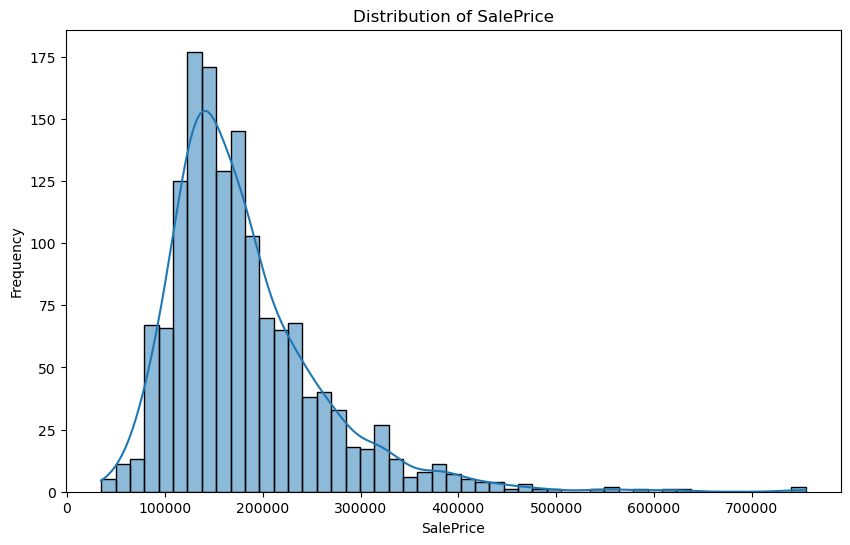

In [35]:
# Plotting the histogram and KDE for SalePrice

plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The histogram in the image, the distribution of ‘SalePrice’ appears to be right-skewed. This is indicated by the long tail extending towards higher ‘SalePrice’ values, while most of the data clusters at lower ‘SalePrice’ values. To normalize this distribution, I will perform a log transformation.

The log transformation will help to make the distribution more symmetric (i.e., more like a normal distribution), which can be beneficial for many statistical analyses.

In [37]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

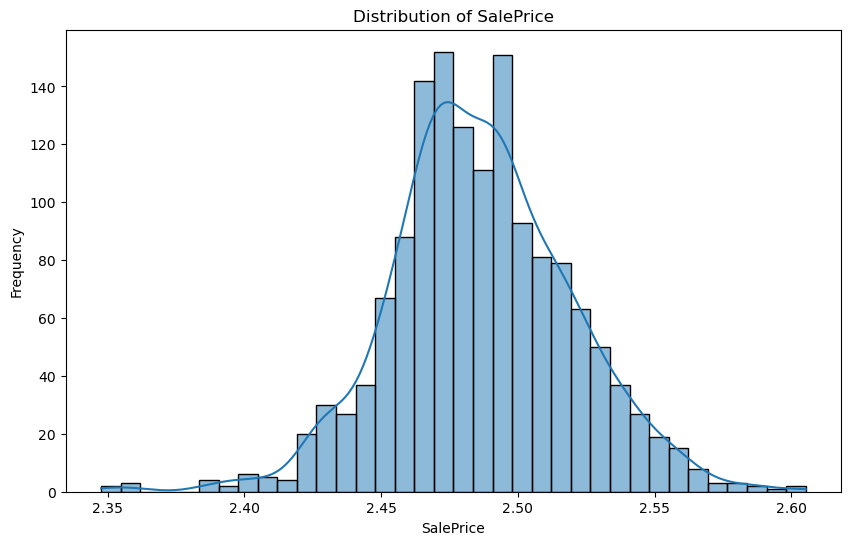

In [38]:
# replotting the histogram and KDE for SalePrice after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### 2. Correlation Analysis

The point of the correlation analysis is to explore relationships between SalePrice and other numerical features.

SalePrice       1.000000
OverallQual     0.814790
GrLivArea       0.696648
GarageCars      0.680087
GarageArea      0.649467
TotalBsmtSF     0.608866
FullBath        0.593850
1stFlrSF        0.593226
YearBuilt       0.588027
YearRemodAdd    0.566881
Name: SalePrice, dtype: float64
BsmtFinSF2       0.006367
BsmtHalfBath    -0.003492
Id              -0.017263
MiscVal         -0.019933
OverallCond     -0.031804
YrSold          -0.037950
LowQualFinSF    -0.038503
MSSubClass      -0.072328
KitchenAbvGr    -0.147187
EnclosedPorch   -0.149920
Name: SalePrice, dtype: float64


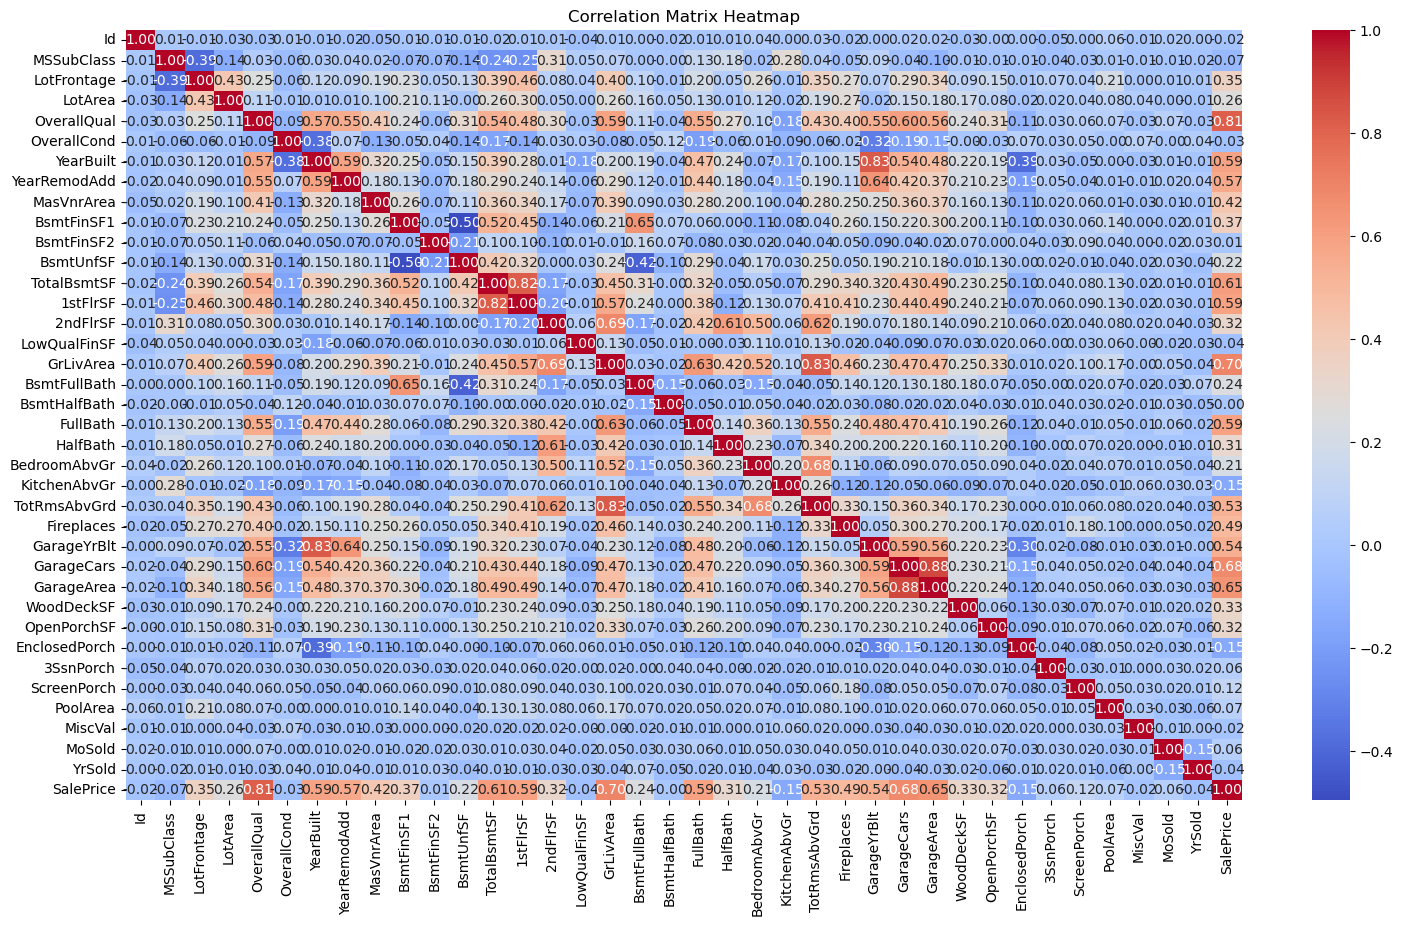

In [45]:

numeric_cols = dataset.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric columns only
corr_matrix = numeric_cols.corr()

# Focus on correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display the top correlations
print(corr_with_saleprice.head(10))  
print(corr_with_saleprice.tail(10))  

# Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


* As a data scientist, my role is not just to analyze data or build models. I also need to interpret the data and communicate the results to stakeholders so that they can better understand the data and make informed decisions.




# Summary and Interpretation of the key findings:

### Top Features with Strong Positive Correlation to SalePrice:

1. OverallQual (0.814790)
* Interpretation: The overall quality of the house (materials and finish) is the most significant predictor of house prices. Higher quality ratings are strongly associated with higher house prices. This feature will be crucial in our predictive model.

2. GrLivArea (0.696648)
* Interpretation: The above-ground living area also has a strong positive correlation with house prices. Larger living areas tend to increase the house's value, making it another key feature.

3. GarageCars (0.680087)
* Interpretation: The number of cars that can fit in the garage is a strong predictor of house prices. Homes with larger garages typically have higher prices.

4. GarageArea (0.649467)
* Interpretation: Similar to GarageCars, the actual square footage of the garage also correlates strongly with house prices.

5. TotalBsmtSF (0.608866)
* Interpretation: The total basement area is another important factor, with larger basements contributing to higher house prices.

6. FullBath (0.593850)
* Interpretation: The number of full bathrooms above grade is positively correlated with house prices, indicating that more bathrooms can significantly increase a home's value.

7. 1stFlrSF (0.593226)
* Interpretation: The square footage of the first floor also plays a critical role in determining house prices.

8. YearBuilt (0.588027)
* Interpretation: Newer houses tend to be more expensive, which is reflected in the positive correlation between the year the house was built and its price.

9. YearRemodAdd (0.566881)
* Interpretation: The year the house was remodeled or had an addition also shows a strong positive correlation, suggesting that recent renovations or additions add significant value.

### Features with Weak or Negative Correlation to SalePrice:

1. BsmtFinSF2 (0.006367)
* Interpretation: The square footage of the second finished basement area has almost no correlation with house prices, making it less significant for the model.

2. BsmtHalfBath (-0.003492)
* Interpretation: The presence of half bathrooms in the basement also has a negligible impact on house prices.

3. Id (-0.017263)
* Interpretation: The Id feature, being a unique identifier, has no relevance to the house price and should be excluded from the model.

4. MiscVal (-0.019933)
* Interpretation: The value of miscellaneous features has a very weak negative correlation, indicating that it may not significantly influence the house price.

5. OverallCond (-0.031804)
* Interpretation: The overall condition of the house has a weak negative correlation with SalePrice, which is surprising but suggests that material quality (OverallQual) is far more 
influential than the overall condition.

6. YrSold (-0.037950)
* Interpretation: The year the house was sold has a slight negative correlation with SalePrice, indicating it does not significantly impact the price.

7. LowQualFinSF (-0.038503)
* Interpretation: Low-quality finished square footage has a weak negative correlation, suggesting that low-quality spaces do not add value.

8. MSSubClass (-0.072328)
* Interpretation: The type of dwelling involved in the sale has a weak negative correlation with house prices, making it a less important predictor.

9. KitchenAbvGr (-0.147187)
* Interpretation: The number of kitchens above grade has a slight negative correlation, suggesting that more kitchens might not necessarily add value.

10. EnclosedPorch (-0.149920)
* Interpretation: Enclosed porches have a weak negative correlation, implying that they might not contribute positively to house prices.

### 3. Categorical Variables Analysis

We want to explore the relationship between key categorical variables and SalePrice. We'll focus on variables like Neighborhood and OverallQual, which are expected to have a significant impact on house prices.

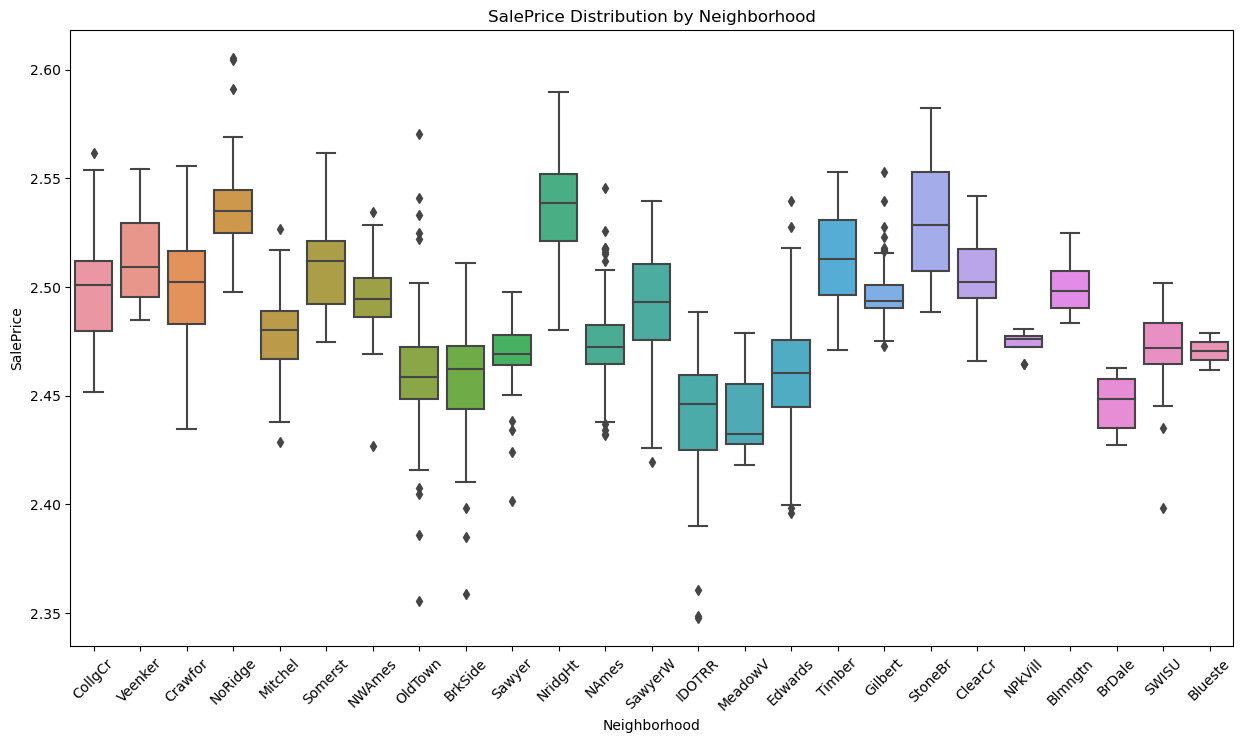

In [47]:
# Plotting the relationship between Neighborhood and SalePrice
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=dataset)
plt.title('SalePrice Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

### SalePrice Distribution by Neighborhood

* Observation: The box plot shows that there are significant differences in SalePrice across different neighborhoods.

* High-Value Neighborhoods: NoRidge, NridgHt, StoneBr: These neighborhoods tend to have higher median SalePrice, indicating that houses in these areas are more expensive.

* Low-Value Neighborhoods: MeadowV, IDOTRR, BrDale: These neighborhoods tend to have lower median SalePrice, suggesting that houses in these areas are less expensive.

* Variation within Neighborhoods: Some neighborhoods show a wide range of house prices (e.g., OldTown, NAmes), indicating diverse housing stock with varying quality or features.

* Implications for Modeling: Neighborhood as a Key Feature: The Neighborhood variable is clearly a critical predictor of house prices and should be included in the model.
Potential Bias: The wide variation in prices within some neighborhoods may indicate the need to explore interactions with other variables to ensure fair predictions across different areas.

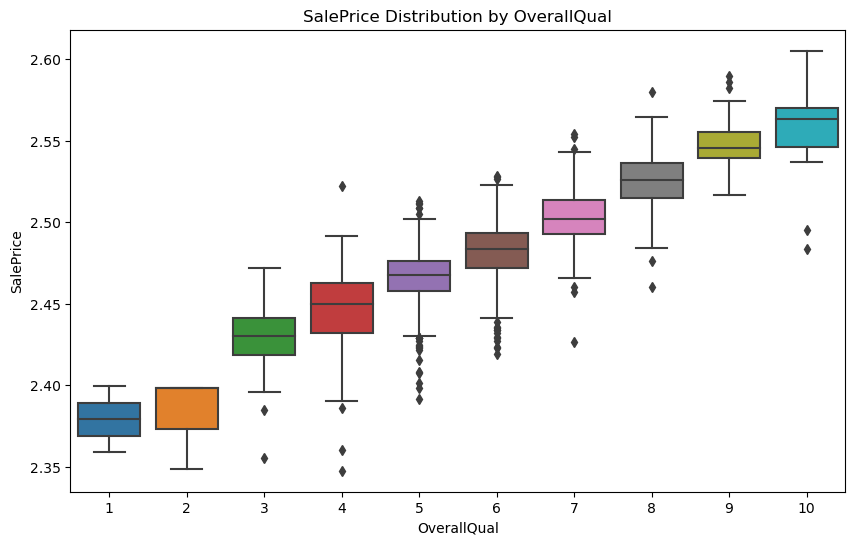

In [49]:
# Plotting the relationship between OverallQual and SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset)
plt.title('SalePrice Distribution by OverallQual')
plt.show()

### SalePrice Distribution by OverallQual

* Observation: The box plot shows a clear positive trend between OverallQual (the overall quality of the house) and SalePrice.

* High Quality (OverallQual 8-10): Houses with high-quality ratings tend to have significantly higher prices. This suggests that investing in high-quality materials and finishes can lead to higher property values.

* Low Quality (OverallQual 1-3): Houses with low-quality ratings are associated with much lower prices. These houses are likely to require significant investment to bring them up to higher standards.

* Implications for Modeling: OverallQual as a Strong Predictor: The OverallQual feature should be a primary input in your model due to its strong correlation with SalePrice.
Consider Non-linear Relationships: The nearly linear trend suggests that the relationship between OverallQual and SalePrice might be straightforward, but exploring any potential non-linear effects or interactions with other variables could improve model accuracy.

### 4. Missing Data Analysis and Handling

Here, we will identify missing data in the dataset and decide on the appropriate strategies for handling it. This is crucial to ensure that our model is robust and accurate.

I'm going to be using the PyJanitor libaries that i imported at the begining of the code.

In [50]:

# Identify missing data
missing_data = dataset.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

# Clean the data using pyjanitor
cleaned_df = dataset.clean_names().remove_empty()

# Print the cleaned DataFrame
print(cleaned_df)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64
        id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL    

In [53]:
# Assuming `cleaned_df` is your DataFrame
numeric_cols = cleaned_df.select_dtypes(include=[np.number])

# Impute missing values for numerical features with the median of each column
cleaned_df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# Identify categorical columns
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns

# Impute missing values for categorical features with the mode of each column
cleaned_df[categorical_cols] = cleaned_df[categorical_cols].fillna(cleaned_df[categorical_cols].mode().iloc[0])

# Verify if any missing data remains
print(cleaned_df.isnull().sum().sort_values(ascending=False))


id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64


We have handled the missing data and the data is clean and ready for modeling. Next is selecting and training the model.


<img src="ml-high-level-overview.png" alt="description of the image" width="1400" height="750" >

# F. Model Selection and Training

### 1. Split the Dataset:

In [59]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = cleaned_df.drop(columns=['saleprice'])  # Features (remove the target variable)
y = cleaned_df['saleprice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (1168, 80), (1168,)
Testing set: (292, 80), (292,)
